In [6]:
# Guardar el dataframe final con los clusters en un archivo Excel
try:
    df_final.to_excel('/content/titanic_clusters.xlsx', index=False)
    print("\n✅ Resultados guardados en '/content/titanic_clusters.xlsx'")
except Exception as e:
    print(f"❌ Error al guardar el archivo Excel: {e}")
    print("Verifica los permisos de escritura o la ruta del archivo.")


✅ Resultados guardados en '/content/titanic_clusters.xlsx'


In [7]:
# Profiling Simple de los Datos del Titanic
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Configuramos el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

**Primer profiling de datos**

In [9]:
# 1. CARGAR LOS DATOS
print("1. CARGANDO DATOS...")
try:
    df = pd.read_excel('/content/nuevos datos titanic.xlsx')
    print(f"✅ Datos cargados exitosamente")
    print(f"📊 Dimensiones: {df.shape[0]} filas y {df.shape[1]} columnas\n")
except Exception as e:
    print(f"❌ Error al cargar el archivo: {e}")
    print("Verifica que la ruta del archivo sea correcta\n")

1. CARGANDO DATOS...
✅ Datos cargados exitosamente
📊 Dimensiones: 500 filas y 6 columnas



In [10]:
# 2. INFORMACIÓN GENERAL
print("2. INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(f"Número de filas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print(f"Columnas: {list(df.columns)}")
print()

2. INFORMACIÓN GENERAL DEL DATASET
Número de filas: 500
Número de columnas: 6
Columnas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age']



In [15]:
# 3. TIPOS DE DATOS
print("3. TIPOS DE DATOS")
print("="*50)
print(df.dtypes)
print(

3. TIPOS DE DATOS
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
dtype: object



In [16]:
# 4. PRIMERAS 5 FILAS
print("4. PRIMERAS 5 FILAS")
print("="*50)
print(df.head())
print()

4. PRIMERAS 5 FILAS
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  
0                            Braund, Mr. Owen Harris    male  22.0  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  
2                             Heikkinen, Miss. Laina  female  26.0  
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  
4                           Allen, Mr. William Henry    male  35.0  



In [17]:
# 5. ESTADÍSTICAS DESCRIPTIVAS
print("5. ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe(include='all'))
print()

5. ESTADÍSTICAS DESCRIPTIVAS
        PassengerId    Survived      Pclass                Name   Sex  \
count    500.000000  500.000000  500.000000                 500   500   
unique          NaN         NaN         NaN                 500     2   
top             NaN         NaN         NaN  Svensson, Mr. Olof  male   
freq            NaN         NaN         NaN                   1   315   
mean     250.500000    0.386000    2.326000                 NaN   NaN   
std      144.481833    0.487318    0.827704                 NaN   NaN   
min        1.000000    0.000000    1.000000                 NaN   NaN   
25%      125.750000    0.000000    2.000000                 NaN   NaN   
50%      250.500000    0.000000    3.000000                 NaN   NaN   
75%      375.250000    1.000000    3.000000                 NaN   NaN   
max      500.000000    1.000000    3.000000                 NaN   NaN   

               Age  
count   500.000000  
unique         NaN  
top            NaN  
freq      


5.1. REPRESENTACIÓN GRÁFICA DE ESTADÍSTICAS DESCRIPTIVAS


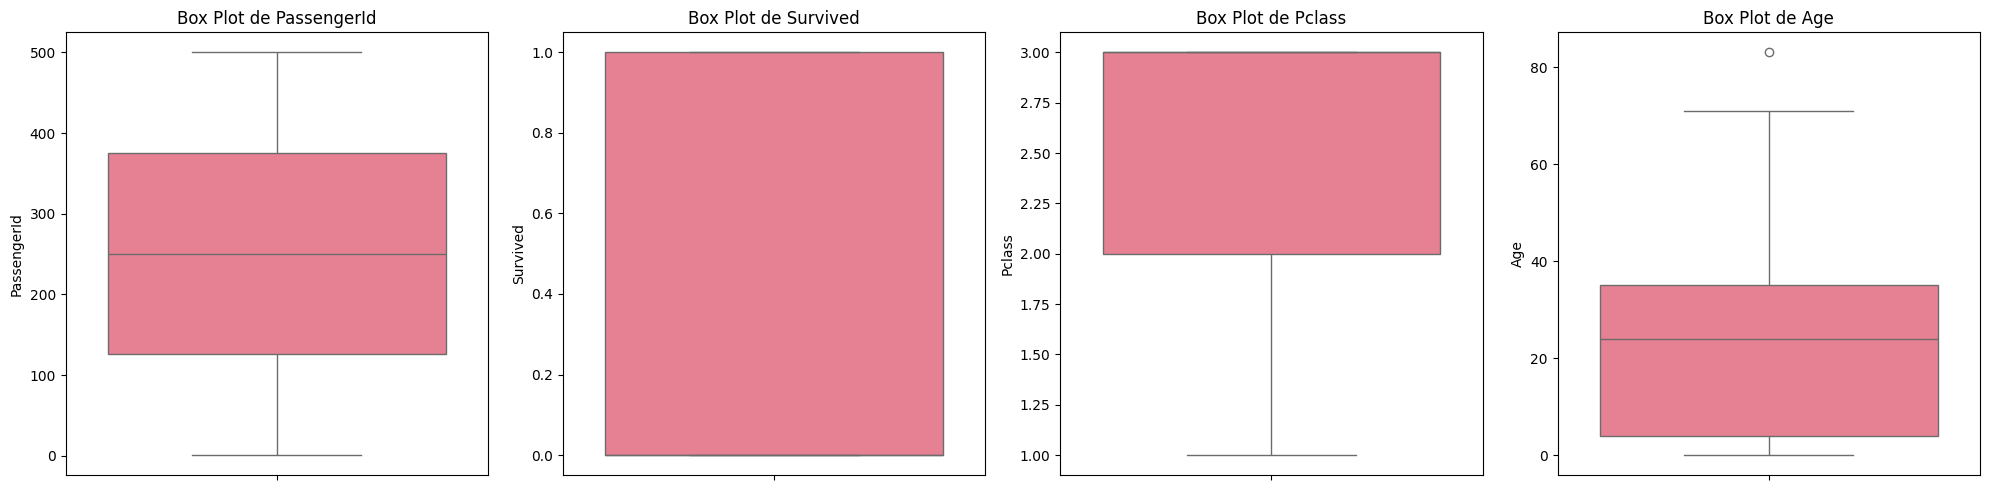

In [19]:
# 6. VALORES FALTANTES
print("6. ANÁLISIS DE VALORES FALTANTES")
print("="*50)
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

resumen_faltantes = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentaje': porcentaje_faltantes
})
resumen_faltantes = resumen_faltantes[resumen_faltantes['Valores Faltantes'] > 0]

if len(resumen_faltantes) > 0:
    print(resumen_faltantes)
else:
    print("✅ No hay valores faltantes en el dataset")
print()



6. ANÁLISIS DE VALORES FALTANTES
✅ No hay valores faltantes en el dataset



In [20]:
# 7. ANÁLISIS POR COLUMNAS PRINCIPALES
print("7. ANÁLISIS POR COLUMNAS PRINCIPALES")
print("="*50)

# Verificamos si existen las columnas típicas del Titanic
columnas_comunes = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for columna in columnas_comunes:
    if columna in df.columns:
        print(f"\n--- {columna.upper()} ---")
        if df[columna].dtype == 'object':
            print(f"Valores únicos: {df[columna].nunique()}")
            print("Distribución:")
            print(df[columna].value_counts())
        else:
            print(f"Mín: {df[columna].min():.2f}")
            print(f"Máx: {df[columna].max():.2f}")
            print(f"Media: {df[columna].mean():.2f}")
            print(f"Mediana: {df[columna].median():.2f}")



7. ANÁLISIS POR COLUMNAS PRINCIPALES

--- SURVIVED ---
Mín: 0.00
Máx: 1.00
Media: 0.39
Mediana: 0.00

--- PCLASS ---
Mín: 1.00
Máx: 3.00
Media: 2.33
Mediana: 3.00

--- SEX ---
Valores únicos: 2
Distribución:
Sex
male      315
female    185
Name: count, dtype: int64

--- AGE ---
Mín: 0.00
Máx: 83.00
Media: 23.49
Mediana: 24.00



8. GENERANDO GRÁFICOS...


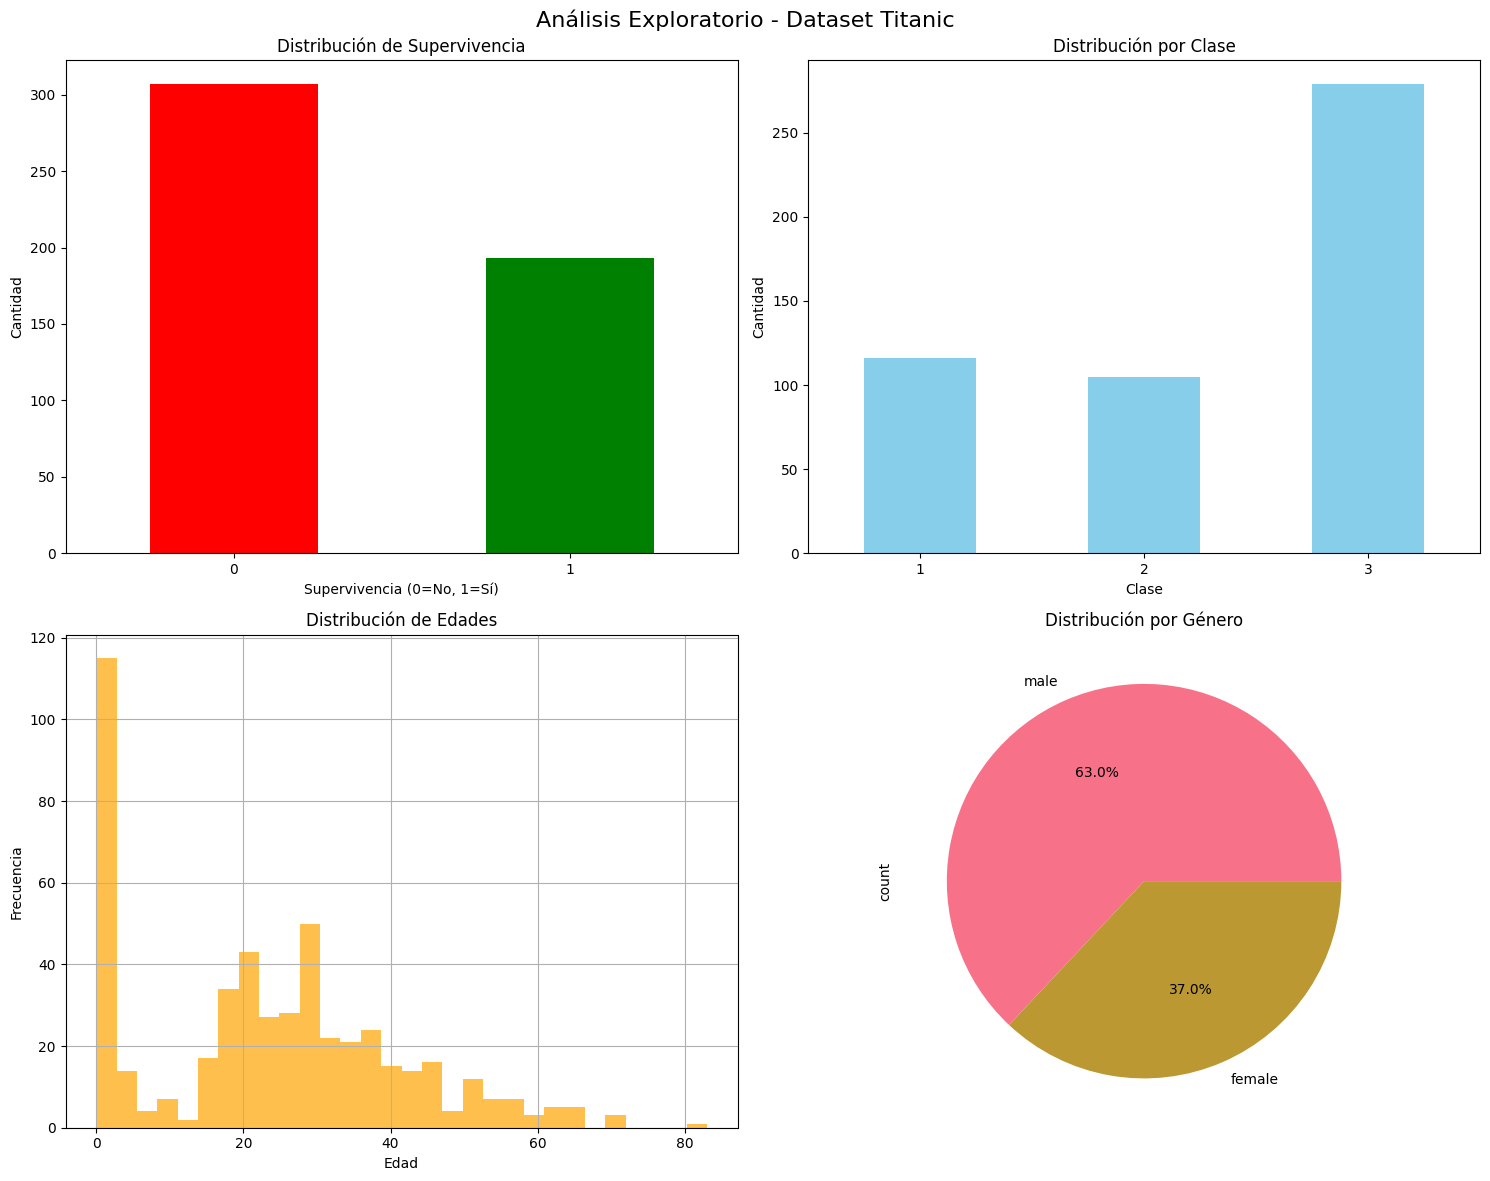

In [21]:
# 8. CREAR GRÁFICOS BÁSICOS
print("\n8. GENERANDO GRÁFICOS...")
print("="*50)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Exploratorio - Dataset Titanic', fontsize=16)

# Gráfico 1: Supervivencia
if 'Survived' in df.columns:
    df['Survived'].value_counts().plot(kind='bar', ax=axes[0,0], color=['red', 'green'])
    axes[0,0].set_title('Distribución de Supervivencia')
    axes[0,0].set_xlabel('Supervivencia (0=No, 1=Sí)')
    axes[0,0].set_ylabel('Cantidad')
    axes[0,0].tick_params(axis='x', rotation=0)

# Gráfico 2: Clase de pasajeros
if 'Pclass' in df.columns:
    df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color='skyblue')
    axes[0,1].set_title('Distribución por Clase')
    axes[0,1].set_xlabel('Clase')
    axes[0,1].set_ylabel('Cantidad')
    axes[0,1].tick_params(axis='x', rotation=0)

# Gráfico 3: Distribución de edades
if 'Age' in df.columns:
    df['Age'].hist(bins=30, ax=axes[1,0], color='orange', alpha=0.7)
    axes[1,0].set_title('Distribución de Edades')
    axes[1,0].set_xlabel('Edad')
    axes[1,0].set_ylabel('Frecuencia')

# Gráfico 4: Género
if 'Sex' in df.columns:
    df['Sex'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
    axes[1,1].set_title('Distribución por Género')

plt.tight_layout()
plt.show()




9. MATRIZ DE CORRELACIONES


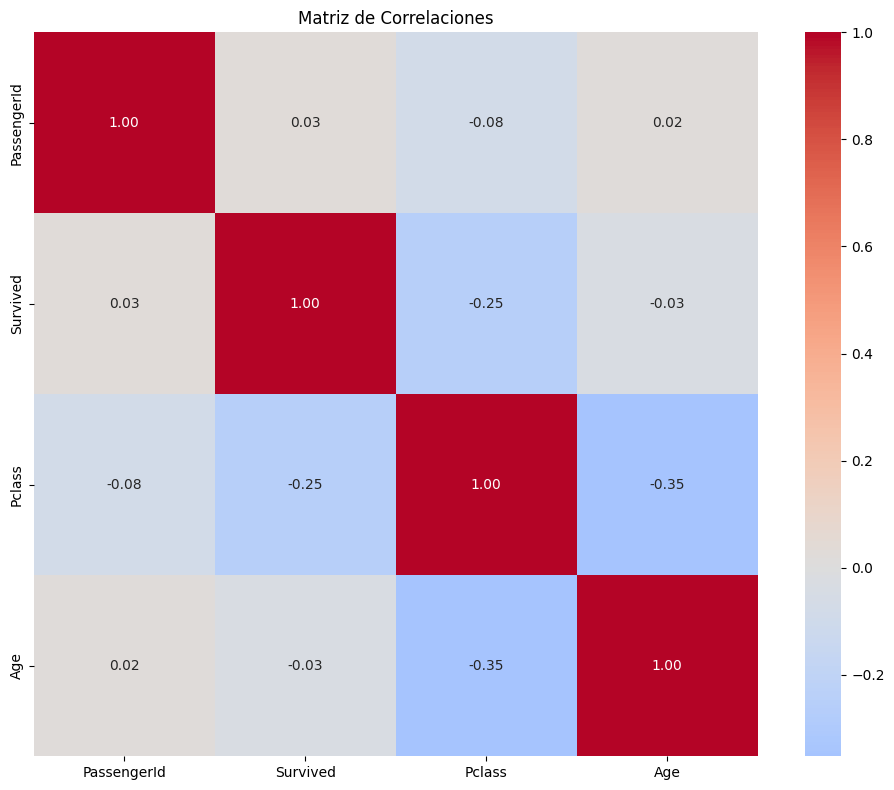

Correlaciones más fuertes (valor absoluto > 0.3):
Pclass - Age: -0.352


In [22]:
# 9. CORRELACIONES (solo para variables numéricas)
print("\n9. MATRIZ DE CORRELACIONES")
print("="*50)

# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()

    # Crear heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    print("Correlaciones más fuertes (valor absoluto > 0.3):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.3:
                print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_value:.3f}")



In [23]:
# 10. RESUMEN FINAL
print("\n10. RESUMEN FINAL")
print("="*50)
print(f"📊 Dataset con {df.shape[0]} registros y {df.shape[1]} variables")
print(f"📈 Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"📝 Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")

# Calcular porcentaje de datos completos
datos_completos = df.dropna().shape[0]
porcentaje_completos = (datos_completos / len(df)) * 100
print(f"✅ Registros completos: {datos_completos} ({porcentaje_completos:.1f}%)")

if 'Survived' in df.columns:
    tasa_supervivencia = df['Survived'].mean() * 100
    print(f"🚢 Tasa de supervivencia: {tasa_supervivencia:.1f}%")

print("\n¡Análisis completado! 🎉")


10. RESUMEN FINAL
📊 Dataset con 500 registros y 6 variables
📈 Variables numéricas: 4
📝 Variables categóricas: 2
✅ Registros completos: 500 (100.0%)
🚢 Tasa de supervivencia: 38.6%

¡Análisis completado! 🎉


**Clusterización**

In [24]:
# ANÁLISIS DE CLUSTERING - TITANIC
# K-means y Clustering Jerárquico

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')



In [25]:
# 1. CARGAR Y PREPARAR LOS DATOS
print("1. CARGANDO Y PREPARANDO LOS DATOS...")
print("="*50)

# Cargar datos
df = pd.read_excel('/content/nuevos datos titanic.xlsx')
print(f"✅ Datos cargados: {df.shape}")

# Crear una copia para trabajar
df_cluster = df.copy()


1. CARGANDO Y PREPARANDO LOS DATOS...
✅ Datos cargados: (500, 6)


In [26]:
# 2. PREPARACIÓN DE DATOS PARA CLUSTERING
print("\n2. PREPARACIÓN DE DATOS PARA CLUSTERING")
print("="*50)

# Seleccionar columnas relevantes (ajustar según tu dataset)
columnas_numericas = df_cluster.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_cluster.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas encontradas: {columnas_numericas}")
print(f"Columnas categóricas encontradas: {columnas_categoricas}")

# Función para preparar los datos
def preparar_datos_clustering(df):
    df_prep = df.copy()

    # Manejar valores faltantes
    # Para numéricas: rellenar con la media
    for col in columnas_numericas:
        if col in df_prep.columns:
            df_prep[col].fillna(df_prep[col].mean(), inplace=True)

    # Para categóricas: rellenar con la moda
    for col in columnas_categoricas:
        if col in df_prep.columns:
            df_prep[col].fillna(df_prep[col].mode()[0], inplace=True)

    # Codificar variables categóricas
    le = LabelEncoder()
    for col in columnas_categoricas:
        if col in df_prep.columns:
            df_prep[col + '_encoded'] = le.fit_transform(df_prep[col])

    return df_prep

df_prep = preparar_datos_clustering(df_cluster)

# Seleccionar solo columnas numéricas para clustering
columnas_para_cluster = []
for col in df_prep.columns:
    if df_prep[col].dtype in ['int64', 'float64']:
        columnas_para_cluster.append(col)

print(f"\nColumnas seleccionadas para clustering: {columnas_para_cluster}")

# Crear dataset final para clustering
X = df_prep[columnas_para_cluster].copy()
print(f"Dataset para clustering: {X.shape}")



2. PREPARACIÓN DE DATOS PARA CLUSTERING
Columnas numéricas encontradas: ['PassengerId', 'Survived', 'Pclass', 'Age']
Columnas categóricas encontradas: ['Name', 'Sex']

Columnas seleccionadas para clustering: ['PassengerId', 'Survived', 'Pclass', 'Age', 'Name_encoded', 'Sex_encoded']
Dataset para clustering: (500, 6)


In [27]:
# 5. CLUSTERING K-MEANS
print(f"\n5. CLUSTERING K-MEANS (k={k_optimo})")
print("="*50)

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Agregar clusters al dataframe original
df_resultado = df_prep.copy()
df_resultado['Cluster_KMeans'] = clusters_kmeans

print(f"✅ K-means completado con {k_optimo} clusters")
print("\nDistribución de clusters K-means:")
print(pd.Series(clusters_kmeans).value_counts().sort_index())



5. CLUSTERING K-MEANS (k=2)
✅ K-means completado con 2 clusters

Distribución de clusters K-means:
0    317
1    183
Name: count, dtype: int64


In [28]:
# 6. CLUSTERING JERÁRQUICO
print(f"\n6. CLUSTERING JERÁRQUICO")
print("="*50)

# Realizar clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=k_optimo, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(X_scaled)

# Agregar al dataframe
df_resultado['Cluster_Hierarchical'] = clusters_hierarchical

print(f"✅ Clustering jerárquico completado con {k_optimo} clusters")
print("\nDistribución de clusters jerárquicos:")
print(pd.Series(clusters_hierarchical).value_counts().sort_index())



6. CLUSTERING JERÁRQUICO
✅ Clustering jerárquico completado con 2 clusters

Distribución de clusters jerárquicos:
0    194
1    306
Name: count, dtype: int64



7. DENDROGRAMA


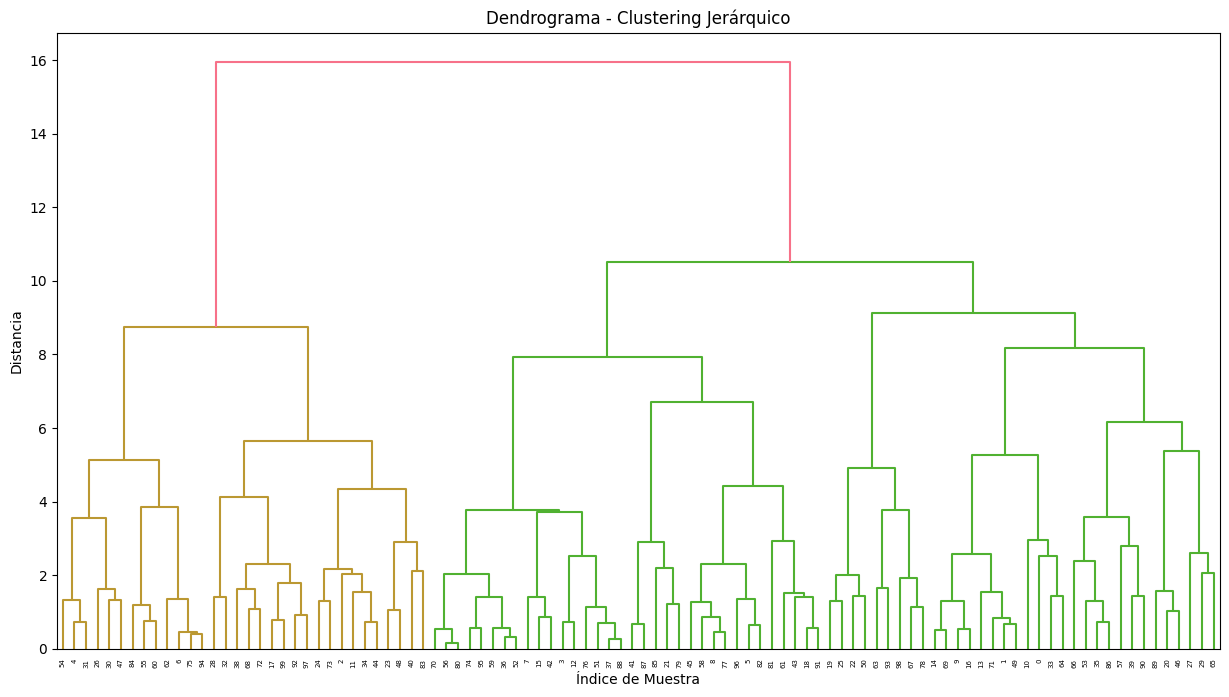

In [29]:
# 7. DENDROGRAMA
print("\n7. DENDROGRAMA")
print("="*50)

# Crear dendrograma (usar una muestra si hay muchos datos)
n_samples = min(100, len(X_scaled))  # Máximo 100 muestras para visualización
sample_indices = np.random.choice(len(X_scaled), n_samples, replace=False)
X_sample = X_scaled[sample_indices]

linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()




8. VISUALIZACIÓN DE CLUSTERS CON PCA


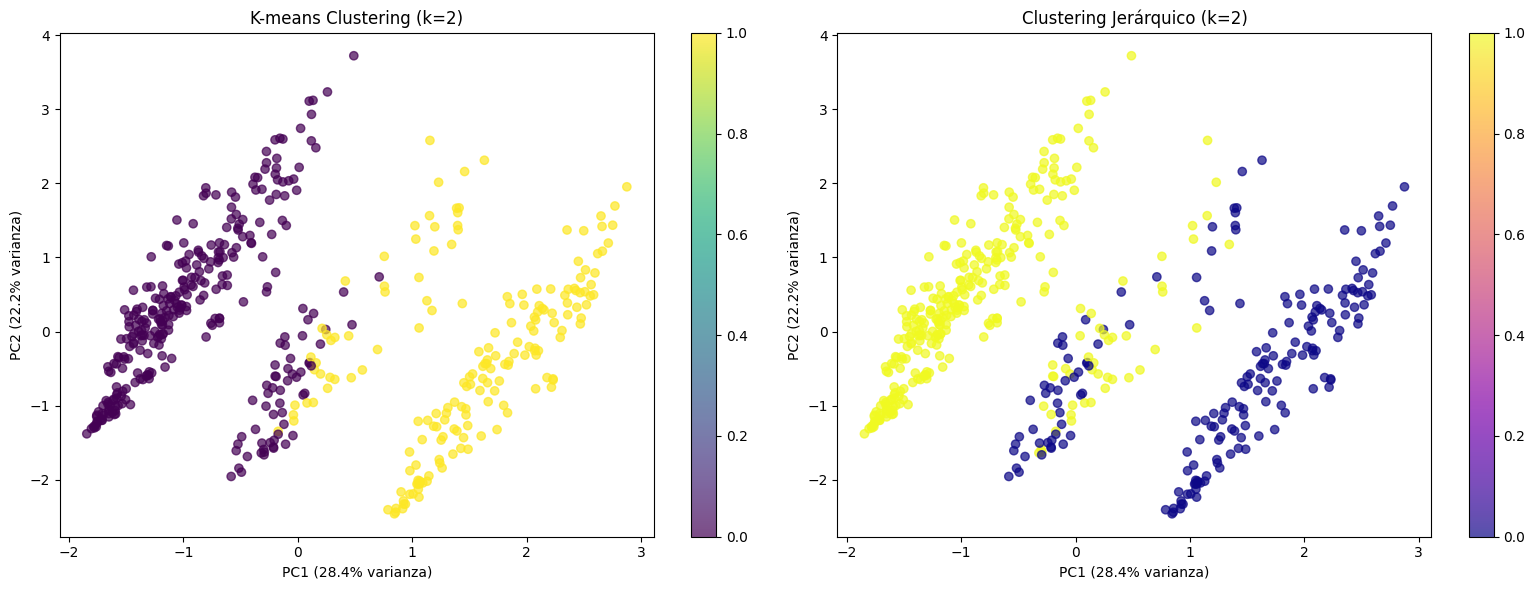

PCA explica 50.7% de la varianza total


In [30]:
# 8. VISUALIZACIÓN CON PCA
print("\n8. VISUALIZACIÓN DE CLUSTERS CON PCA")
print("="*50)

# Reducir dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# K-means
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)
ax1.set_title(f'K-means Clustering (k={k_optimo})')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.colorbar(scatter1, ax=ax1)

# Jerárquico
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_hierarchical, cmap='plasma', alpha=0.7)
ax2.set_title(f'Clustering Jerárquico (k={k_optimo})')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

print(f"PCA explica {sum(pca.explained_variance_ratio_):.1%} de la varianza total")



In [31]:
# 9. ANÁLISIS DE CLUSTERS
print("\n9. ANÁLISIS DE CLUSTERS")
print("="*50)

# Estadísticas por cluster para K-means
print("--- ANÁLISIS K-MEANS ---")
for i in range(k_optimo):
    print(f"\nCluster {i}:")
    cluster_data = df_resultado[df_resultado['Cluster_KMeans'] == i]
    print(f"  Tamaño: {len(cluster_data)} ({len(cluster_data)/len(df_resultado)*100:.1f}%)")

    # Mostrar características principales del cluster
    for col in columnas_para_cluster[:5]:  # Primeras 5 columnas numéricas
        if col in cluster_data.columns:
            media = cluster_data[col].mean()
            print(f"  {col}: {media:.2f}")

print("\n--- ANÁLISIS JERÁRQUICO ---")
for i in range(k_optimo):
    print(f"\nCluster {i}:")
    cluster_data = df_resultado[df_resultado['Cluster_Hierarchical'] == i]
    print(f"  Tamaño: {len(cluster_data)} ({len(cluster_data)/len(df_resultado)*100:.1f}%)")

    # Mostrar características principales del cluster
    for col in columnas_para_cluster[:5]:  # Primeras 5 columnas numéricas
        if col in cluster_data.columns:
            media = cluster_data[col].mean()
            print(f"  {col}: {media:.2f}")




9. ANÁLISIS DE CLUSTERS
--- ANÁLISIS K-MEANS ---

Cluster 0:
  Tamaño: 317 (63.4%)
  PassengerId: 245.43
  Survived: 0.04
  Pclass: 2.53
  Age: 23.83
  Name_encoded: 266.45

Cluster 1:
  Tamaño: 183 (36.6%)
  PassengerId: 259.28
  Survived: 0.98
  Pclass: 1.98
  Age: 22.89
  Name_encoded: 220.14

--- ANÁLISIS JERÁRQUICO ---

Cluster 0:
  Tamaño: 194 (38.8%)
  PassengerId: 253.34
  Survived: 0.78
  Pclass: 2.15
  Age: 22.33
  Name_encoded: 236.10

Cluster 1:
  Tamaño: 306 (61.2%)
  PassengerId: 248.70
  Survived: 0.14
  Pclass: 2.43
  Age: 24.22
  Name_encoded: 258.00


In [32]:
# 9.1. Presentar resultados de análisis de clusters en tablas
print("\n9.1. RESULTADOS DEL ANÁLISIS DE CLUSTERS EN TABLAS")
print("="*50)

# Función para generar tabla de resumen de clusters
def resumir_clusters(df_resultado, cluster_col, columnas_para_cluster):
    resumen = pd.DataFrame()
    for i in sorted(df_resultado[cluster_col].unique()):
        cluster_data = df_resultado[df_resultado[cluster_col] == i]
        resumen_fila = {'Cluster': i, 'Tamaño': len(cluster_data), '% del Total': f"{len(cluster_data)/len(df_resultado)*100:.1f}%"}
        for col in columnas_para_cluster:
             if col in cluster_data.columns:
                resumen_fila[col] = cluster_data[col].mean()
        resumen = pd.concat([resumen, pd.DataFrame([resumen_fila])], ignore_index=True)
    return resumen

# Resumen para K-means
print("\n--- RESUMEN POR CLUSTER (K-MEANS) ---")
resumen_kmeans = resumir_clusters(df_resultado, 'Cluster_KMeans', columnas_para_cluster)
display(resumen_kmeans)

# Resumen para Clustering Jerárquico
print("\n--- RESUMEN POR CLUSTER (JERÁRQUICO) ---")
resumen_hierarchical = resumir_clusters(df_resultado, 'Cluster_Hierarchical', columnas_para_cluster)
display(resumen_hierarchical)


9.1. RESULTADOS DEL ANÁLISIS DE CLUSTERS EN TABLAS

--- RESUMEN POR CLUSTER (K-MEANS) ---


,Cluster,Tamaño,% del Total,PassengerId,Survived,Pclass,Age,Name_encoded,Sex_encoded
0,0,317,63.4%,245.432177,0.041009,2.526814,23.831230,266.451104,0.864353
1,1,183,36.6%,259.278689,0.983607,1.978142,22.886175,220.136612,0.224044



--- RESUMEN POR CLUSTER (JERÁRQUICO) ---


,Cluster,Tamaño,% del Total,PassengerId,Survived,Pclass,Age,Name_encoded,Sex_encoded
0,0,194,38.8%,253.335052,0.778351,2.154639,22.328196,236.097938,0.061856
1,1,306,61.2%,248.702614,0.137255,2.434641,24.218954,257.996732,0.990196


In [33]:
# 10. COMPARACIÓN DE MÉTODOS
print("\n10. COMPARACIÓN DE MÉTODOS")
print("="*50)

# Silhouette scores
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
silhouette_hierarchical = silhouette_score(X_scaled, clusters_hierarchical)

print(f"Silhouette Score K-means: {silhouette_kmeans:.3f}")
print(f"Silhouette Score Jerárquico: {silhouette_hierarchical:.3f}")

# Coincidencia entre métodos
coincidencia = sum(clusters_kmeans == clusters_hierarchical) / len(clusters_kmeans)
print(f"Coincidencia entre métodos: {coincidencia:.1%}")




10. COMPARACIÓN DE MÉTODOS
Silhouette Score K-means: 0.248
Silhouette Score Jerárquico: 0.235
Coincidencia entre métodos: 15.0%


In [34]:
# 11. GUARDAR RESULTADOS
print("\n11. GUARDANDO RESULTADOS")
print("="*50)

# Crear dataframe con resultados
df_final = df.copy()
df_final['Cluster_KMeans'] = clusters_kmeans
df_final['Cluster_Hierarchical'] = clusters_hierarchical

print("✅ Resultados agregados al dataframe original")
print("\nPrimeras 5 filas con clusters:")
print(df_final[['Cluster_KMeans', 'Cluster_Hierarchical']].head())

# 12. RESUMEN FINAL
print("\n12. RESUMEN FINAL")
print("="*50)
print(f"🔍 Análisis completado con {len(df)} registros")
print(f"📊 Variables utilizadas: {len(columnas_para_cluster)}")
print(f"🎯 Número óptimo de clusters: {k_optimo}")
print(f"⭐ Mejor método según Silhouette Score: {'K-means' if silhouette_kmeans > silhouette_hierarchical else 'Jerárquico'}")
print(f"🤝 Coincidencia entre métodos: {coincidencia:.1%}")

print("\n¡Análisis de clustering completado! 🎉")
print("\nPuedes usar 'df_final' que contiene los datos originales + los clusters asignados")


11. GUARDANDO RESULTADOS
✅ Resultados agregados al dataframe original

Primeras 5 filas con clusters:
   Cluster_KMeans  Cluster_Hierarchical
0               0                     1
1               1                     0
2               1                     0
3               1                     0
4               0                     1

12. RESUMEN FINAL
🔍 Análisis completado con 500 registros
📊 Variables utilizadas: 6
🎯 Número óptimo de clusters: 2
⭐ Mejor método según Silhouette Score: K-means
🤝 Coincidencia entre métodos: 15.0%

¡Análisis de clustering completado! 🎉

Puedes usar 'df_final' que contiene los datos originales + los clusters asignados


In [36]:
# Guardar el dataframe final con los clusters en un archivo Excel
try:
    df_final.to_excel('/content/titanic_clusters.xlsx', index=False)
    print("\n✅ Resultados guardados en '/content/titanic_clusters.xlsx'")
except Exception as e:
    print(f"❌ Error al guardar el archivo Excel: {e}")
    print("Verifica los permisos de escritura o la ruta del archivo.")


✅ Resultados guardados en '/content/titanic_clusters.xlsx'
